## Dependencias

In [478]:
import sys
import numpy as np
import matplotlib
import time
%matplotlib inline
import matplotlib.pyplot as plt
from enum import Enum, auto
import math
import os

In [479]:
global_threshold = 0.0001 

## Ejercicio 1

### Datos

In [480]:
a_matrix =         np.array([[ 2,  3,  7],
                    [ 4,  -1,  1],]).astype(np.float64)

### Implementación

In [481]:
def triangular_sin_pivot(M):
    # Itera sobre las columnas de la matriz hasta la penúltima
    for i in range(0, len(M[0]) - 2):
        # Itera sobre las filas por debajo de la diagonal principal
        for j in range(i+1, len(M)):
            # Verifica si el elemento diagonal es cercano al umbral para evitar la división por cero
            if not np.isclose(M[i][i], global_threshold):
                m_ji = M[j][i] / M[i][i]  # Calcula el multiplicador para hacer ceros debajo de la diagonal
                # Aplica la eliminación a cada elemento de la fila
                for k in range(i, len(M[0])):
                    M[j][k] = M[j][k] - m_ji * M[i][k]
            else:
                # Lanza una excepción si el pivote es demasiado pequeño
                raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
    return M  # Devuelve la matriz triangular superior modificada

def solve_sys_EGsin(M):
    M_res = triangular_sin_pivot(M)  # Triangulariza la matriz sin pivotamiento
    x = back_subs(M_res)  # Resuelve el sistema usando sustitución hacia atrás
    return x  # Devuelve la solución del sistema

def back_subs(M):
    n = len(M)
    x = []
    # Inicializa el vector de soluciones con ceros
    for i in range(n):
        x.append(np.float64(0))
    # Recorre las filas desde la última hasta la primera
    for i in reversed(range(n)):
        x[i] = M[i][n-1]  # Inicia con el término independiente
        # Sustrae los productos de los elementos ya conocidos
        for j in range(i+1, n):
            if not np.isclose(M[i][j], global_threshold):
                x[i] = x[i] - M[i][j] * x[j]
        x[i] = x[i] / M[i][i]  # Divide por el coeficiente diagonal para obtener la variable actual
    return x  # Devuelve el vector solución


solve_sys_EGsin(a_matrix)

[0.0, 1.0]

## Ejercicio 2

### Datos

In [482]:
b_matrix =         np.array([[ 1,  1,  1,  1, 10],
                    [ 1,  1,  1,  1, 11],
                    [ 1,  2,  1,  1, 12],
                    [ 1,  2,  1,  1, 13]]).astype(np.float64)

a_matrix2 = np.array([[ 1,  1,  0,  0, 0],
                     [ 2,  0,  0,  0, 0],
                     [ 0,  2,  1,  4, 0],
                     [ 0,  0,  2,  1, 0]]).astype(np.float64)

#Funcion para la experimentacion del item c)
def create_matrix_with_epsilon_float64(epsilon):
    c_matrix = np.array([[ 1.0,  2.0+epsilon,  3.0-epsilon,  6.0],
                     [ 1.0-epsilon,  2.0,  3.0+epsilon,  6.0],
                     [ 1.0+epsilon,  2.0-epsilon,  3.0,  6.0]]).astype(np.float64)
    return c_matrix

def create_matrix_with_epsilon_float32(epsilon):
    c_matrix = np.array([[ 1.0,  2.0+epsilon,  3.0-epsilon,  6.0],
                     [ 1.0-epsilon,  2.0,  3.0+epsilon,  6.0],
                     [ 1.0+epsilon,  2.0-epsilon,  3.0,  6.0]]).astype(np.float32)
    return c_matrix

x_64=np.array([1,1,1]).astype(np.float64)
x_32=np.array([1,1,1]).astype(np.float32)
#for i in np.logspace(1e-6, 10, endpoint=True):
 #   print(create_matrix_with_epsilon_float64(i))

### Código

In [483]:
##item a
def elim_gauss_con_pivot(M, threshold):
    # Itera sobre cada columna de la matriz hasta la penúltima
    for i in range(0, len(M[0]) - 2):
        # Inicializa la fila y el valor máximo para la búsqueda del pivote
        j_max = i
        val_j_max = 0
        # Busca el máximo absoluto en la columna actual debajo de la fila i para pivoteo
        for j_pivot in range(i + 1, len(M)):
            if abs(M[j_pivot][i]) > val_j_max:
                val_j_max = abs(M[j_pivot][i])
                j_max = j_pivot
        
        # Realiza el intercambio de filas: fila i con fila j_max (pivote)
        for p in range(i, len(M[0])):
            m_ip = M[i][p]
            M[i][p] = M[j_max][p]
            M[j_max][p] = m_ip
        
        # Aplica la eliminación gaussiana para hacer ceros debajo del pivote actual
        for j in range(i + 1, len(M)):
            # Verifica si el elemento diagonal es cercano al umbral para evitar la división por cero
            if not np.isclose(M[i][i], global_threshold):
                m_ji = float(M[j][i]) / float(M[i][i])
                # Resta el múltiplo adecuado de la fila i de todas las filas debajo de i
                for k in range(i, len(M[0])):
                    M[j][k] = M[j][k] - m_ji * M[i][k]
            else:
                # Si el elemento diagonal es demasiado pequeño, verifica errores en otras filas
                for jerror in range(i + 1, len(M)):
                    if not np.isclose(M[jerror][i], global_threshold):
                        raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
    return M  # Devuelve la matriz modificada con la parte superior triangular



def back_subs64(M):
    n = len(M) 
    x = np.zeros(n).astype(np.float64) 
    # Sustitución hacia atrás para resolver la matriz triangular superior
    for i in reversed(range(n)):
        x[i] = M[i][n]  # Comienza con el término constante de la ecuación
        # Realiza la sustitución hacia atrás ajustando x[i] considerando las soluciones ya encontradas
        if not np.isclose(M[i][i], global_threshold):
            for j in range(i + 1, n):
                x[i] -= M[i][j] * x[j]
            x[i] /= M[i][i]  # Divide por el coeficiente diagonal para aislar el término de la solución
    return x

def back_subs32(M):
    n = len(M)
    x = np.zeros(n).astype(np.float32)
    # Proceso similar al anterior, pero utilizando variables de precisión simple
    for i in reversed(range(n)):
        x[i] = M[i][n] # Comienza con el término constante de la ecuación
        # Realiza la sustitución hacia atrás ajustando x[i] considerando las soluciones ya encontradas
        if not np.isclose(M[i][i], global_threshold):
            for j in range(i + 1, n):
                x[i] -= M[i][j] * x[j]
            x[i] /= M[i][i] # Divide por el coeficiente diagonal para aislar el término de la solución
    return x

def solve_sys_EG64(M, threshold):
    M_res = elim_gauss_con_pivot(M, threshold) 
    x = back_subs64(M_res) 
    return x

def solve_sys_EG32(M, threshold):
    M_res = elim_gauss_con_pivot(M, threshold) 
    x = back_subs32(M_res)
    return x

elim_gauss_con_pivot(a_matrix2, 0.0001)


matrix_no_solution = np.array([[ 1,  0,  0, 1],
                               [ 2,  0,  0, 1],
                               [ 0,  0,  0, 2],
                               [ 0,  0,  1, 1]]).astype(np.float64)

##item c
def inf_norm(v, w):
  res=0
  for i in range(len(v)):
    res = max(res, abs(v[i]-w[i]))
  return res

solve_sys_EG32(np.array([[1,2,3,3],[1,3,4,4], [1,2,5,5]]).astype(np.float64), 0.01)

array([ 0., -0.,  1.], dtype=float32)

[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


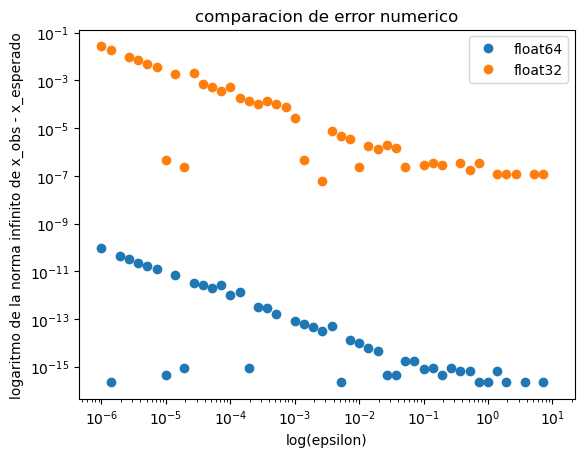

In [484]:
def numeric_error_exp():
  v_epsilon = np.logspace(-6, 1, endpoint=True)
  threshold = 1e-10
  v_res64 = np.zeros(len(v_epsilon))
  v_res32 = np.zeros(len(v_epsilon))

  for i in range(len(v_epsilon)):
    matrix_c = create_matrix_with_epsilon_float64(v_epsilon[i])
    x_obt = solve_sys_EG64(matrix_c, threshold)
    print(x_obt)
    v_res64[i] = np.linalg.norm(x_obt- x_64, np.inf)
      
  for i in range(len(v_epsilon)):
    matrix_c = create_matrix_with_epsilon_float32(v_epsilon[i])
    x_obt = solve_sys_EG32(matrix_c, threshold)
    v_res32[i] = np.linalg.norm(x_obt - x_32, np.inf)

  fig, ax = plt.subplots( nrows=1, ncols=1 )
  ax.loglog(v_epsilon, v_res64, 'o', label = "float64")
  ax.loglog(v_epsilon, v_res32, 'o', label = "float32")

  ax.set_title('comparacion de error numerico')
  ax.legend()
  plt.xlabel("log(epsilon)")
  plt.ylabel("logaritmo de la norma infinito de x_obs - x_esperado")
  plt.savefig('error_numerico_exp.png')
  plt.show()
  

numeric_error_exp()


## Ejercicio 3

### Datos

In [485]:
matriz_tridiagonal_facil =  np.array(
                   [[ 4,  8,  0, 1],
                    [ 2,  8,  16, 8],
                    [ 0,  8,  2, 13]]).astype(np.float64)

#solve_sys_EG64(matriz_tridiagonal_facil, 0000.1)

### Implementacion

#### Eliminación Gaussiana para Tridiagonales

In [486]:
def elim_gauss_tridiagonal(M):
    for i in range(0, len(M) - 1):
        if not np.isclose(M[i][i], global_threshold):
            # Calcula el factor de multiplicación para eliminar el elemento subdiagonal
            m_ji = M[i + 1][i] / M[i][i]
            # Elimina el elemento subdiagonal
            M[i + 1][i] = M[i + 1][i] - m_ji * M[i][i]
            # Actualiza el elemento diagonal de la siguiente fila
            M[i + 1][i + 1] = M[i + 1][i + 1] - m_ji * M[i][i + 1]
            # Actualiza el término constante de la siguiente fila
            M[i + 1][len(M[0]) - 1] = M[i + 1][len(M[0]) - 1] - m_ji * M[i][len(M[0]) - 1]
        else:
            # Si el elemento diagonal es demasiado pequeño, verifica errores en las filas subsiguientes
            for jerror in range(i + 1, len(M)):
                if not np.isclose(M[jerror][i], global_threshold):
                    raise Exception("No se puede realizar la eliminacion gaussiana con i:" + str(i) + " y j: " + str(j))
    return M  # Retorna la matriz modificada con ceros debajo de la diagonal principal

def back_subs_tridiagonal(M):
    n = len(M)  
    m = len(M[0])  
    res = np.zeros(n)  
    # Inicia la sustitución hacia atrás desde la última fila
    res[n - 1] = M[n - 1][m - 1] / M[n - 1][n - 1]
    # Recorre las filas hacia atrás para calcular el resto de las variables
    for i in range(n - 2, -1, -1):
        res[i] = (M[i][m - 1] - M[i][i + 1] * res[i + 1]) / M[i][i]
    return res 

def sol_sys_tridiagonal(matriz_tridiagonal_facil):
    # Realiza la eliminación gaussiana seguida de la sustitución hacia atrás para resolver el sistema
    return back_subs_tridiagonal(elim_gauss_tridiagonal(matriz_tridiagonal_facil))

  


#### Algoritmo de Thomas

In [487]:
def thomas_algorithm_consigna(a, b, c, d):
    # Calculo c' y d'
    c_prima = np.zeros(len(c))
    d_prima = np.zeros(len(d))
    for i in range (0, len(c)):
        if i == 0:
            c_prima[i] = c[i] / b[i]
        else:
            c_prima[i] = c[i] / (b[i]-a[i-1]*c_prima[i-1])     

    for i in range (0, len(d)):
        if i == 0:
            d_prima[i] = d[i] / b[i]
        else:
            d_prima[i] = (d[i]-a[i-1]*d_prima[i-1]) / (b[i]-a[i-1]*c_prima[i-1])   

    # Resuelvo
    res = np.zeros(len(d))
    res[len(d) - 1] = d_prima[len(d) - 1]
    for i in range(len(res) - 2, -1, -1):
        res[i] = d_prima[i] - (c_prima[i] * res[i+1]) 
    return res


#### Algoritmo de Thomas - Precómputo

In [488]:
class Precomputo(Enum):
    w = auto()
    b = auto()
    c = auto()

def thomas_algorithm_precomputo(a, b, c, d):
    res = np.zeros(len(d))
    for i in range (0, len(a)):
        w = a[i] / b[i]
        b[i+1] =  b[i+1] - w * c[i]
        d[i+1] =  d[i+1] - w * d[i]


    res[len(d) - 1] = d[len(d) - 1] / b[len(d) - 1]
    for i in range(len(res) - 2, -1, -1):
        res[i] = (d[i] - c[i] * res[i+1]) / b[i]
  
    return res

# NOTAR 
# len(a) = n - 1
# len(b) = n
# len(c) = n - 1
# len(d) = n  
def precomputo_de_thomas_algorithm(a, b, c):
    w = np.zeros(len(a))
    for i in range (0, len(a)):
        w[i] = a[i] / b[i]
        b[i+1] =  b[i+1] - w[i] * c[i]

    precomputo = [w, b, c]

    return precomputo

def thomas_algorithm_precomputo(precomputo, d):
    w, b, c = precomputo
    res = np.zeros(len(d))
    for i in range (0, len(w)):
        d[i+1] =  d[i+1] - w[i] * d[i]


    res[len(d) - 1] = d[len(d) - 1] / b[len(b) - 1]
    for i in range(len(res) - 2, -1, -1):
        res[i] = (d[i] - c[i] * res[i+1]) / b[i]
    
    return res

## Ejercicio 4


### Datos

In [489]:
d_a = []
d_b = np.full(101, np.float64(4) / np.float64(101**2))
d_c = []
n = 101

for i in range(0, 101):
    value = 0
    if i == ((101 // 2) + 1):
        value = 4/101
    d_a.append(value)


for i in range(0, 101):
    value =  (np.float64(-1) + (np.float64(2*i) / np.float64(n - 1))) * (np.float64(12) / np.float64(n*n))
    d_c.append(value)


In [490]:
d = []
for i in range(0, 101):
    d.append(i)

def create_matrix_with_d(d):
    m_res = np.zeros((101,102)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=-2
        if(i+1<=100):
            m_res[i+1][i]=1
            m_res[i][i+1]=1    
    for i in range(101):
        m_res[i][101]= d[i]
    return m_res  

create_matrix_with_d(d)      

array([[ -2.,   1.,   0., ...,   0.,   0.,   0.],
       [  1.,  -2.,   1., ...,   0.,   0.,   1.],
       [  0.,   1.,  -2., ...,   0.,   0.,   2.],
       ...,
       [  0.,   0.,   0., ...,   1.,   0.,  98.],
       [  0.,   0.,   0., ...,  -2.,   1.,  99.],
       [  0.,   0.,   0., ...,   1.,  -2., 100.]])

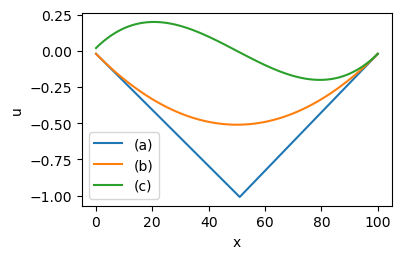

In [491]:
def verificacion_exp(ds):
  a_laplace = np.full(100, 1).astype(np.float64)
  b_laplace = np.full(101, -2).astype(np.float64)
  c_laplace = np.full(100, 1).astype(np.float64)
  x = range(0, 101)
  x_ds = np.zeros((3, 101))
  precomputo = precomputo_de_thomas_algorithm(a_laplace, b_laplace, c_laplace)

  for i in range(3):
    matrix_c = create_matrix_with_d(ds[i])
    x_ds[i] = thomas_algorithm_precomputo(precomputo, ds[i])
    
  fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(4, 2.5))

  plt.plot(x, x_ds[0], label = "(a)")
  plt.plot(x, x_ds[1], label = "(b)")
  plt.plot(x, x_ds[2], label = "(c)")

  yticks = np.arange(-1, 0.50, 0.25)
  ax.set_yticks(yticks) 
  ax.set_xlabel("x")
  ax.set_ylabel("u")
  plt.legend()
  fig.savefig('verificacion_tridiagonal.png')
  plt.show()
  
  
  return

verificacion_exp([d_a, d_b, d_c])


## Ejercicio 5

experimentacion del punto a
generar matrices tridiagonales de distintos tamaños(10, 1e2, 1e3, .. 1e10) o un rango menor si es muy grande 
r=5000

2 casos
1) probar generando el laplaciano de distintos tamaños
2) podemos probar generando matrices tridiagonales aleatorias.

### Datos

In [492]:
def create_matrix_laplaciano(n):
    m_res = np.zeros((n,n)).astype(np.float64)
    for i in range(n):
        m_res[i][i] = -2
        if(i+1<= n - 1):
            m_res[i+1][i] = 1
            m_res[i][i+1] = 1
    return m_res

def create_matrix_laplaciano_with_d(d):
    M = create_matrix_laplaciano(len(d))
    columna_nueva = np.array(d).reshape(len(d), 1)
    matriz_expandida = np.concatenate((M, columna_nueva), axis=1)
    return matriz_expandida



n = 10
def create_laplaciano_testing_instace(n):
    lista = np.arange(1, n+1, 1)
    return create_matrix_laplaciano_with_d(lista)
     


create_laplaciano_testing_instace(n)


array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  5.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  7.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  8.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  9.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2., 10.]])

In [493]:
def guardar_datos(mediciones, nombre_del_archivo):
    with open(f'{nombre_del_archivo}.txt', 'w') as archivo:
    # Escribe cada medición en una nueva línea
        for medicion in mediciones:
            archivo.write(f'{medicion}\n')


In [494]:
def levantar_datos_float(nombre_del_archivo):
    # Crear una lista vacía para almacenar los números flotantes
    lista = []
    # Abrir el archivo de texto en modo de lectura
    with open(nombre_del_archivo, 'r') as archivo:
        # Leer cada línea del archivo
        for linea in archivo:
            # Convertir la línea a un número flotante y añadirlo a la lista
            numero_flotante = float(linea.strip())
            lista.append(numero_flotante)
    return lista

def levantar_datos_int(nombre_del_archivo):
    # Crear una lista vacía para almacenar los números flotantes
    lista = []
    # Abrir el archivo de texto en modo de lectura
    with open(nombre_del_archivo, 'r') as archivo:
        # Leer cada línea del archivo
        for linea in archivo:
            # Convertir la línea a un número flotante y añadirlo a la lista
            numero_flotante = int(linea.strip())
            lista.append(numero_flotante)
    return lista



### Implementación

In [495]:
instance_size = []
for i in range (3, 18):
    instance_size.append(math.floor(1.5**i))

print(instance_size)

[3, 5, 7, 11, 17, 25, 38, 57, 86, 129, 194, 291, 437, 656, 985]


##### Punto A

In [496]:
instance_size = []
for i in range (3, 15):
    instance_size.append(math.floor(1.5**i))

print(instance_size)
# instance_size = [8, 16, 32, 64, 128, 256, 512]

cantidad_de_iteraciones = 3

resultsEG = np.zeros(len(instance_size))
resultsEGT = np.zeros(len(instance_size))
for i in range(0, len(instance_size)):
    laplacian_matrix = create_laplaciano_testing_instace(instance_size[i])
    time_res = []
    for j in range(0, cantidad_de_iteraciones):
        tic = time.time()
        res = solve_sys_EG64(laplacian_matrix, 0.000001)
        toc = time.time()
        time_res.append(abs(toc - tic))
    resultsEG[i] =  min(time_res)
    
    time_res = []
    for j in range(0, cantidad_de_iteraciones):
        tic = time.time()
        res = sol_sys_tridiagonal(laplacian_matrix)
        toc = time.time()
        time_res.append(abs(toc - tic))
    resultsEGT[i] =  min(time_res)


# guardar_datos(resultsEG, "resultsEG")
# guardar_datos(resultsEGT, "resultsEGT")
# guardar_datos(instance_size, "instance_size")

[3, 5, 7, 11, 17, 25, 38, 57, 86, 129, 194, 291]


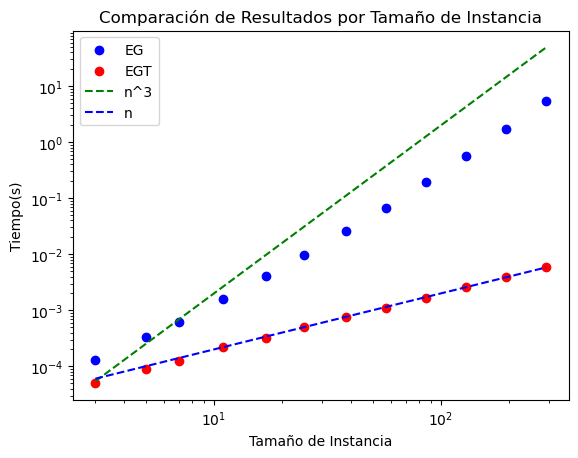

In [497]:
def plot_eg():
    plt.scatter(instance_size, resultsEG, color='blue', label='EG')  # Puntos para resultsEG
    plt.scatter(instance_size, resultsEGT, color='red', label='EGT')  # Puntos para resultsEGT


    n_values = np.array(instance_size)
    n_cubed = (n_values**3) * 1e-5 / 5
    n_linear = (n_values) * 1e-4/5

    plt.plot(n_values, n_cubed, 'g--', label='n^3')  # Línea para n^3
    plt.plot(n_values, n_linear, 'b--', label='n')  # Línea para n^1
    #corregir escala
    plt.yscale('log')
    plt.xscale('log')
    # Añadiendo detalles al gráfico
    plt.title('Comparación de Resultados por Tamaño de Instancia')
    plt.xlabel('Tamaño de Instancia')
    plt.ylabel('Tiempo(s)')
    plt.legend()  # Esto muestra las etiquetas de cada conjunto de puntos
    plt.savefig('eliminacion_gaussiana_vs_eliminacion_gaussiana_tridiagonal.png')
    # Mostrar el gráfico
    plt.show()


plot_eg()

In [498]:
def levantar_datos_punto_5():
    resultsEG = levantar_datos_float("resultsEG.txt")
    resultsEGT = levantar_datos_float("resultsEGT.txt")
    instance_size = levantar_datos_float("instance_size.txt")
    resultsEGTridiagonal = levantar_datos_float("resultsEGTridiagonal.txt")
    resultsEGPrecomputo = levantar_datos_float("resultsEGPrecomputo.txt")
    repeticiones = levantar_datos_float("repeticiones.txt")

#levantar_datos_punto_5()

##### Punto B

In [499]:

n = 50 #Tamaño fijo VER que hace eta variable
repeticiones = [] # Cantidad de repeticiones en la iteración i-ésima
for i in range (3,18):
    repeticiones.append(math.floor(1.5**i))


# repeticiones = [3, 5, 7, 11, 17, 25, 38, 57, 86, 129, 194, 291, 437, 656, 985]
resultsEGTridiagonal = np.zeros(len(repeticiones)) 
resultsEGPrecomputo = np.zeros(len(repeticiones))

a_laplace = np.full(100-1, 1).astype(np.float64)
b_laplace = np.full(100, -2).astype(np.float64)
c_laplace = np.full(100-1, 1).astype(np.float64)
d_laplace = np.arange(1, 100+1, 1).astype(np.float64)
laplacian_matrix = create_laplaciano_testing_instace(100)

cantidad_de_iteraciones = 3

for i in range (0, len(repeticiones)):
    time_res = 0
    tic = time.time()
    results = []
    for k in range (0, cantidad_de_iteraciones):
        for j in range(0, repeticiones[i]):
            res = elim_gauss_tridiagonal(laplacian_matrix)
        toc = time.time()
        results.append(toc - tic)

    resultsEGTridiagonal[i] = min(results)  

for i in range (0, len(repeticiones)):
    time_res = 0
    tic = time.time()
    results = []
    for k in range (0, cantidad_de_iteraciones):
        precomputo = precomputo_de_thomas_algorithm(a_laplace, b_laplace, c_laplace)
        for j in range(0, repeticiones[i]):
            res = thomas_algorithm_precomputo(precomputo, d_laplace)
        toc = time.time()
        results.append(toc - tic)

    resultsEGPrecomputo[i] = min(results)

# guardar_datos(resultsEGTridiagonal, "resultsEGTridiagonal")
# guardar_datos(resultsEGPrecomputo, "resultsEGPrecomputo")
# guardar_datos(repeticiones, "repeticiones")

/tmp/ipykernel_9847/3462356816.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  w[i] = a[i] / b[i]
/tmp/ipykernel_9847/3462356816.py:39: RuntimeWarning: invalid value encountered in scalar multiply
  d[i+1] =  d[i+1] - w[i] * d[i]


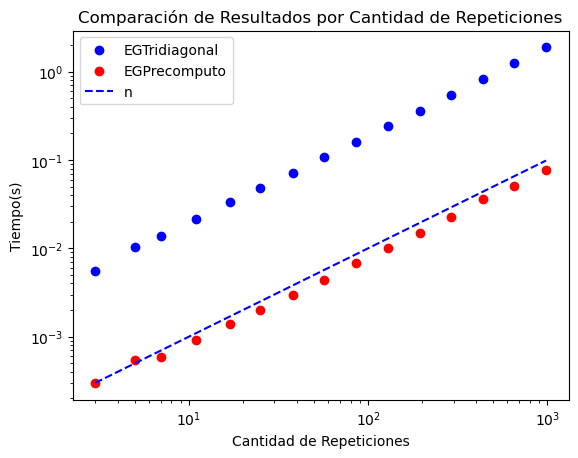

In [500]:
def plot_eg():
    plt.scatter(repeticiones, resultsEGTridiagonal, color='blue', label='EGTridiagonal')  # Puntos para resultsEG
    plt.scatter(repeticiones, resultsEGPrecomputo, color='red', label='EGPrecomputo')  # Puntos para resultsEGT
    n_values = np.array(repeticiones)
    n_linear = (n_values) * 1e-4
    plt.plot(n_values, n_linear, 'b--', label='n')  # Línea para n^1
    #corregir escala
    plt.yscale('log')
    plt.xscale('log')
    # Añadiendo detalles al gráfico
    plt.title('Comparación de Resultados por Cantidad de Repeticiones')
    plt.xlabel('Cantidad de Repeticiones')
    plt.ylabel('Tiempo(s)')
    plt.legend()  # Esto muestra las etiquetas de cada conjunto de puntos
    plt.savefig('eliminacion_gaussiana_vs_precomputo.png')
    # Mostrar el gráfico
    plt.show()


plot_eg()
# plot_grouped_bar_chart()

## Ejercicio 6

### Datos

In [501]:
n = 101
r = 10
m = 1000

def create_u0(n,r):
    u = np.zeros(n).astype(np.float64)
    for i in range(n):
        if(i > (n//2-r) and i < n//2+r):
            u[i]=1
    return u

print(create_u0(n,r))
def create_matrix_explicito(alpha):
    m_res = np.zeros((101,101)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=-2*alpha+1
        if(i+1<=100):
            m_res[i+1][i]=alpha
            m_res[i][i+1]=alpha              
    return m_res  

def create_matrix_implicito(alpha):
    m_res = np.zeros((101,101)).astype(np.float64)
    for i in range(101):
        m_res[i][i]=2*alpha+1
        if(i+1<=100):
            m_res[i+1][i]=alpha*-1
            m_res[i][i+1]=alpha*-1 
    return m_res  

def create_a_implicito(m):
    a = []
    for i in range(1, len(m)):
        a.append(m[i-1][i])
    return a

def create_b_implicito(m):
    a = []
    for i in range(0, len(m)):
        a.append(m[i][i])
    return a


def create_c_implicito(m):
    a = []
    for i in range(0, len(m) - 1):
        a.append(m[i+1][i])
    return a


def create_d_implicito(m):
    return m[:, -1]
    
create_matrix_explicito(1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.]])

##### Item a) Caso Explícito

In [502]:
def mult(A, v):
    v_res = np.zeros(len(v))
    for i in range(len(v)):
        res = 0
        for j in range(len(v)):
            res+= A[i][j]*v[j]
        v_res[i]=res
    return v_res


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00696746, 0.01255598, 0.02088928, ..., 0.02088928, 0.01255598,
        0.00696746],
       [0.00627799, 0.01392837, 0.01882244, ..., 0.01882244, 0.01392837,
        0.00627799],
       [0.00696419, 0.01255022, 0.02087935, ..., 0.02087935, 0.01255022,
        0.00696419]])

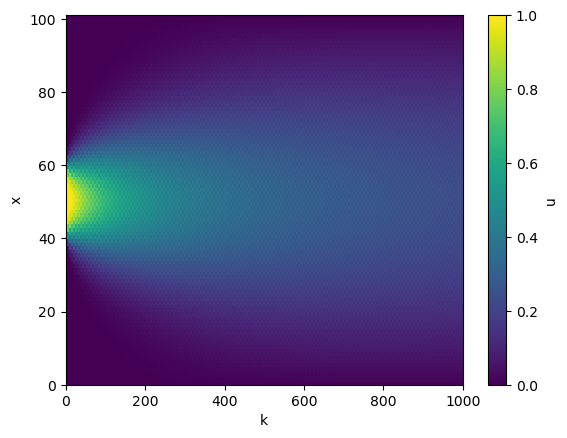

In [503]:

def sim_explicita(u_0, A, m):
    m_res = np.zeros((m,101))
    u=u_0
    m_res[0]=u
    for k in range(1,m):
        u = mult(A, u) 
        m_res[k]= u
        #print(m_res[k])
    return m_res   


alpha = 0.5
x= sim_explicita(create_u0(n,r), create_matrix_explicito(alpha), m)

plt.pcolor(x.T)
plt.colorbar(label="u")
plt.xlabel('k')
plt.ylabel('x')
plt.savefig("explicita.png")

x

##### Item b) Caso Implícito

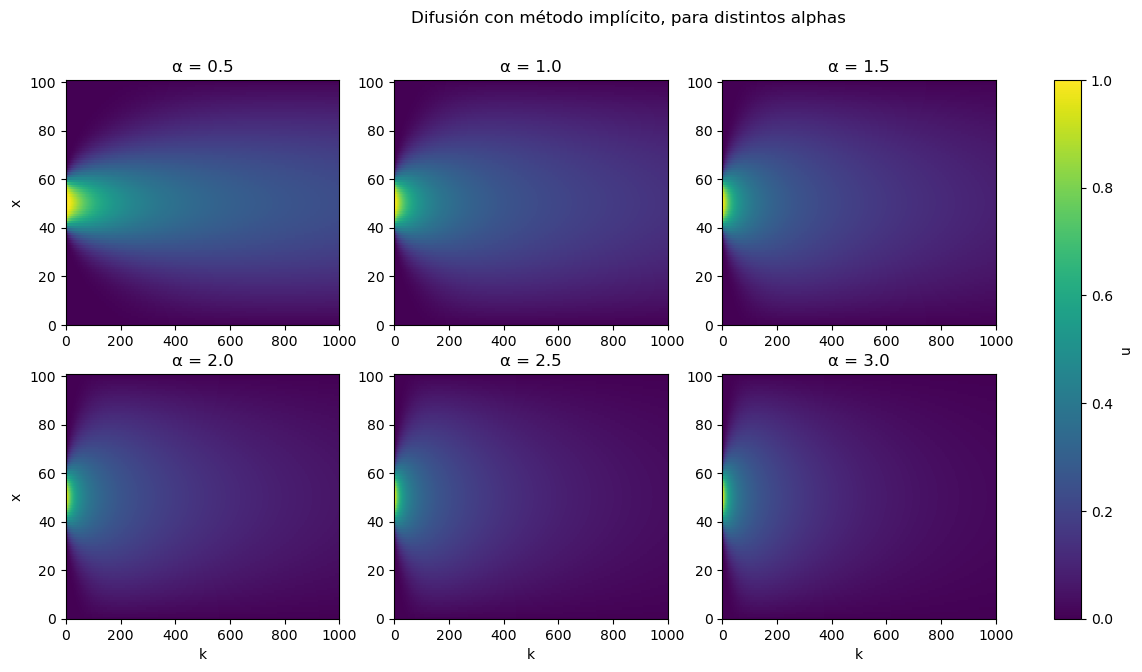

In [504]:
def sim_implicita(u_0, A, m):
    m_res = np.zeros((m,101)).astype(np.float64)
    u=u_0
    m_res[0]=u
    for k in range(1,m):
        a = create_a_implicito(A)
        b = create_b_implicito(A)
        c = create_c_implicito(A)
        u = thomas_algorithm_consigna(a, b, c ,u)
        m_res[k]= u
        #print(m_res[k])
    return m_res   

alphas = np.arange(0.5, 3.5, 0.5)

# Configurar la figura y los ejes
fig, axes = plt.subplots(2, 3, figsize=(15, 7))  # Ajusta el tamaño de la figura según necesites
axes = axes.flatten()  # Aplanar el arreglo de ejes para facilitar la iteración

fig.suptitle('Difusión con método implícito, para distintos alphas')
# Inicializamos una variable para almacenar la última imagen creada para la colorbar
last_img = None
i = 0
n = 101
for ax, alpha in zip(axes, alphas):
    x = sim_implicita(create_u0(n, r), create_matrix_implicito(alpha), m)
    last_img = ax.pcolor(x.T, cmap='viridis')  # Puedes cambiar el colormap si quieres
    ax.set_title(f"α = {alpha}")
    if i == 0 or i == 3:
        ax.set_ylabel('x')
    if 2 < i:
        ax.set_xlabel('k')
    i = i + 1
# Crear una colorbar general para todos los ejes
fig.colorbar(last_img, ax=axes, label="u")

# Ajustar el layout para evitar la superposición

# Mostrar todos los gráficos juntos
plt.savefig("implicito_comparacion_alphas.png")
plt.show()



In [505]:
def contains_nan(matrix):
    for row in matrix:
        for value in row:
            if math.isnan(value):
                return True
    return False

def is_broken(alpha):
    try:
        x = sim_explicita(create_u0(n, r), create_matrix_explicito(alpha), m)
        if contains_nan(x):
            return True
        else:
            return False  # Suponiendo que no se rompió
    except Exception as e:
        return True  # La función lanzó una excepción, asumimos que se rompió

def binary_search_alpha(low, high, tol):
    while high - low > tol:
        mid = (low + ((high - low)/2) )
        if is_broken(mid):
            high = mid  # Reduce el rango hacia valores más pequeños
        else:
            low = mid  # Aumenta el rango hacia valores más grandes
    return mid

# Parámetros iniciales
alpha_low = 0.5
alpha_high = 3.0
tolerance = 0.00001  # Define qué tan preciso quieres ser en la búsqueda de alpha

# Llamada a la función de búsqueda
alpha_breaking_point = binary_search_alpha(alpha_low, alpha_high, tolerance)
print("El valor más pequeño de alpha que rompe la función es:", alpha_breaking_point)


/tmp/ipykernel_9847/3811662613.py:6: RuntimeWarning: overflow encountered in scalar add
  res+= A[i][j]*v[j]
/tmp/ipykernel_9847/3811662613.py:6: RuntimeWarning: overflow encountered in scalar multiply
  res+= A[i][j]*v[j]
/tmp/ipykernel_9847/3811662613.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  res+= A[i][j]*v[j]


KeyboardInterrupt: 

In [ ]:
def borrar_txt_y_png():
    #Obtener la ruta de la carpeta actual donde se ejecuta el script
    current_folder = os.getcwd()

    # Listar todos los archivos en la carpeta
    for filename in os.listdir(current_folder):
        # Verificar si el archivo termina en .txt o .png
        if  filename.endswith('.png') or filename.endswith('.txt'):
            # Construir la ruta completa del archivo
            file_path = os.path.join(current_folder, filename)
            # Eliminar el archivo
            os.remove(file_path)
            print(f"Archivo eliminado: {file_path}")

# borrar_txt_y_png()